## Histogram smoothing

See the seaborn [example](https://stanford.edu/~mwaskom/software/seaborn/tutorial/distributions.html).

In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
sns.set(color_codes=True)

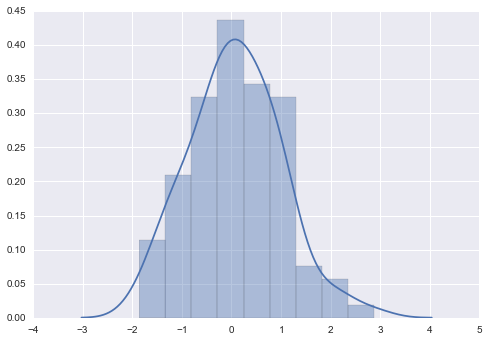

In [3]:
# seaborn example

np.random.seed(sum(map(ord, "distributions")))
x = np.random.normal(size=100)
sns.distplot(x);

In [4]:
phase_hist = np.array([ 64, 101,  65,  86,  68,  78,  84, 105, 101, 110, 110, 104, 101,
                        90,  86, 102, 125, 107, 114, 101, 124, 124,  96,  80,  85,  82,
                        96,  83,  96,  61,  86, 103,  76,  81,  79,  81,  69,  80,  61,
                        76,  70,  82,  76,  61,  83, 112,  87,  59,  61,  71,  66,  76,
                        84,  99, 113, 122, 100, 131, 114, 146, 130, 139, 102,  98, 111,
                        115, 111, 102,  85,  95,  93,  61,  57,  59,  54,  70,  55,  57,
                        62,  73])
phase_hist_triple = np.concatenate((phase_hist, phase_hist, phase_hist))

xdata = np.arange(0, 60, 0.75)
xdata_triple = np.concatenate((xdata - 60, xdata, xdata + 60))

print phase_hist
print xdata

print len(phase_hist)
print len(xdata)

[ 64 101  65  86  68  78  84 105 101 110 110 104 101  90  86 102 125 107
 114 101 124 124  96  80  85  82  96  83  96  61  86 103  76  81  79  81
  69  80  61  76  70  82  76  61  83 112  87  59  61  71  66  76  84  99
 113 122 100 131 114 146 130 139 102  98 111 115 111 102  85  95  93  61
  57  59  54  70  55  57  62  73]
[  0.     0.75   1.5    2.25   3.     3.75   4.5    5.25   6.     6.75
   7.5    8.25   9.     9.75  10.5   11.25  12.    12.75  13.5   14.25  15.
  15.75  16.5   17.25  18.    18.75  19.5   20.25  21.    21.75  22.5
  23.25  24.    24.75  25.5   26.25  27.    27.75  28.5   29.25  30.    30.75
  31.5   32.25  33.    33.75  34.5   35.25  36.    36.75  37.5   38.25  39.
  39.75  40.5   41.25  42.    42.75  43.5   44.25  45.    45.75  46.5
  47.25  48.    48.75  49.5   50.25  51.    51.75  52.5   53.25  54.    54.75
  55.5   56.25  57.    57.75  58.5   59.25]
80
80


In [31]:
# create the pre-binned data

data = []
for phase, count in zip(xdata, phase_hist):
    data.append([phase] * count)
data = np.array(sum(data, []))

data_triple = []
for phase, count in zip(xdata_triple, phase_hist_triple):
    data_triple.append([phase] * count)
data_triple = np.array(sum(data_triple, []))

bins = np.arange(-0.375, 60.375, 0.75)

[(-60.375, 119.625)]

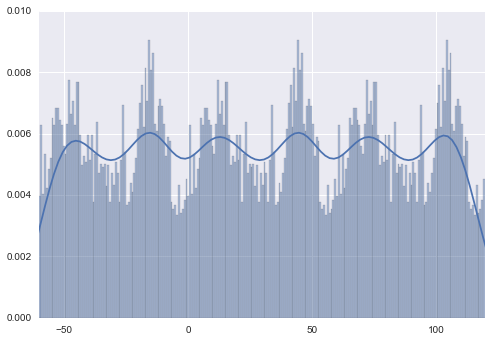

In [6]:
bins = np.arange(-0.375, 60.375, 0.75)
bins_triple = np.arange(-60.375, 120.375, 0.75)
g = sns.distplot(data_triple, norm_hist=False, bins=bins_triple);
g.set(xlim=(bins_triple[0], bins_triple[-1]))
#sns.distplot(data, hist=False, color='red');  # for subsets

[(-0.375, 59.625)]

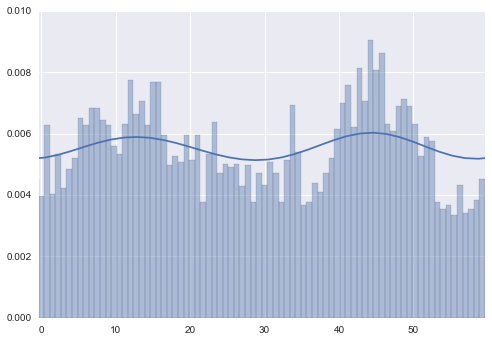

In [7]:
g = sns.distplot(data_triple, norm_hist=False, bins=bins_triple);
g.set(xlim=(bins[0], bins[-1]))


[(-0.375, 59.625)]

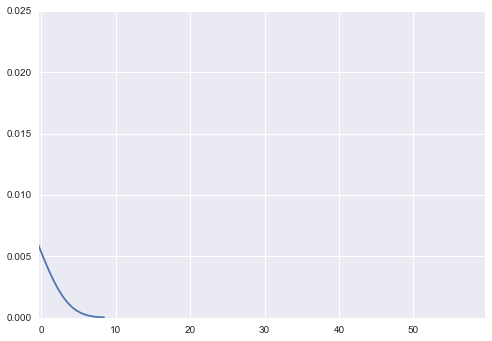

In [8]:
g = sns.distplot(data, norm_hist=False, bins=bins);
g.set(xlim=(bins[0], bins[-1]))

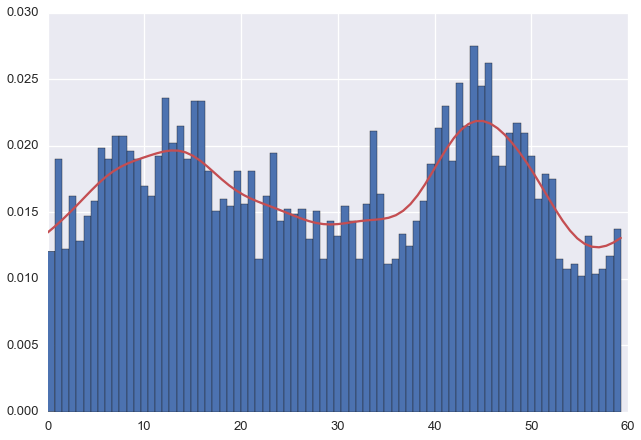

In [42]:
from scipy import stats, integrate
from matplotlib import pylab as plt
from pyqt_fit import kde, kde_methods
import numpy as np


plt.hist(data, bins=80, normed=True)
est = kde.KDE1D(data, lower=0, upper=60, method=kde_methods.cyclic)
plt.plot(xdata, est(xdata), color='r', label=est.method.name)
plt.show()